In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setting

Setup codes

In [2]:
import os
import torch
import collections
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

1. chord dictionary
2. path definition

In [3]:
chord2index = {'N': 0, 'B#:maj': 1, 'C:maj': 1, 'C#:maj': 2, 'Db:maj': 2, 'D:maj': 3, 'D#:maj': 4, 'Eb:maj': 4, 'E:maj': 5, 'Fb:maj': 5, 
               'E#:maj': 6, 'F:maj': 6, 'F#:maj': 7, 'Gb:maj': 7, 'G:maj': 8, 'G#:maj': 9, 'Ab:maj': 9, 'A:maj': 10, 'A#:maj': 11, 
               'Bb:maj': 11, 'B:maj': 12, 'Cb:maj': 12, 'B#:min': 13, 'C:min': 13, 'C#:min': 14, 'Db:min': 14, 'D:min': 15, 
               'D#:min': 16, 'Eb:min': 16, 'E:min': 17, 'Fb:min': 17, 'E#:min': 18, 'F:min': 18, 'F#:min': 19, 'Gb:min': 19, 
               'G:min': 20, 'G#:min': 21, 'Ab:min': 21, 'A:min': 22, 'A#:min': 23, 'Bb:min': 23, 'B:min': 24, 'Cb:min': 24, 'X': 25}
               
index2chord = {0: 'N', 1: 'C:maj', 2: 'C#:maj', 3: 'D:maj', 4: 'Eb:maj', 5: 'E:maj', 6: 'F:maj', 7: 'F#:maj', 8: 'G:maj', 9: 'Ab:maj', 
               10: 'A:maj', 11: 'Bb:maj', 12: 'B:maj', 13: 'C:min', 14: 'C#:min', 15: 'D:min', 16: 'Eb:min', 17: 'E:min', 18: 'F:min', 
               19: 'F#:min', 20: 'G:min', 21: 'Ab:min', 22: 'A:min', 23: 'Bb:min', 24: 'B:min', 25: 'X'}

num_chords = len(index2chord)

chroma_path = '/content/drive/MyDrive/ML Project/McGill-Billboard-2.0-chordino/'
chord_path = '/content/drive/MyDrive/ML Project/McGill-Billboard-2.0-mirex/'

In [4]:
checkpoint_general = torch.load('/content/drive/MyDrive/ML Project/data/General_data.tar')

# General data
file_infos = checkpoint_general['file_infos']
train_files = checkpoint_general['train_files']
validation_files = checkpoint_general['validation_files']
test_files = checkpoint_general['test_files']


checkpoint_LSTM = torch.load('/content/drive/MyDrive/ML Project/data/LSTM_data.tar')

# Task 2: LSTM data
train_chord_sequences = checkpoint_LSTM['train_chord_sequences'] 
validation_chord_sequences = checkpoint_LSTM['validation_chord_sequences']
test_chord_sequences = checkpoint_LSTM['test_chord_sequences']

# 1. Distribution of the length, number of chord X, Maj, and Min

Distribution of the length

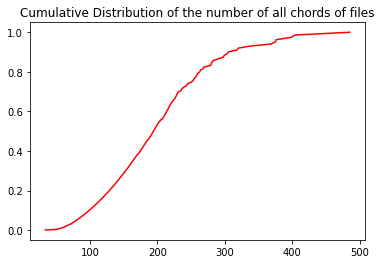

Percentage of files whose length < 200: 52.73%


In [5]:
lengths = [file_infos[file][0] for file in file_infos]
length_counter  = collections.Counter(lengths)
lengths = np.array(list(length_counter.keys()))
sort_idx = np.argsort(lengths)
lengths_sort = lengths[sort_idx]
length_counts = np.array(list(length_counter.values()))
length_counts_sort =lengths[sort_idx]
p = np.cumsum(length_counts_sort) / length_counts_sort.sum()

plt.plot(lengths_sort, p, 'r-')
plt.title("Cumulative Distribution of the number of all chords of files")
plt.show()

print('Percentage of files whose length < 200: {:.2f}%'.format(p[np.where(lengths_sort == 199)[0][0]] * 100))

Distribution of the number of chord X

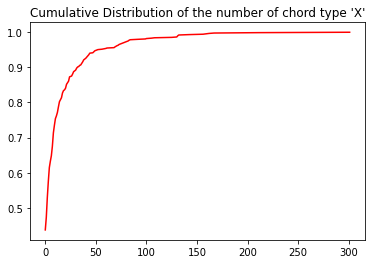

Percentage of files whose X_num < 10: 73.48%


In [6]:
X_nums   = [file_infos[file][1] for file in file_infos]
X_num_counter   = collections.Counter(X_nums)
X_nums = np.array(list(X_num_counter.keys()))
sort_idx = np.argsort(X_nums)
X_nums_sort = X_nums[sort_idx]
X_num_counts = np.array(list(X_num_counter.values()))
X_num_counts_sort = X_num_counts[sort_idx]
p = np.cumsum(X_num_counts_sort) / X_num_counts_sort.sum()

plt.plot(X_nums_sort, p, 'r-')
plt.title("Cumulative Distribution of the number of chord type 'X'")
plt.show()

print('Percentage of files whose X_num < 10: {:.2f}%'.format(p[np.where(X_nums_sort == 9)[0][0]] * 100))

Distribution of the number of major and minor chords

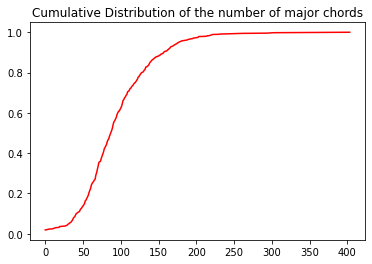

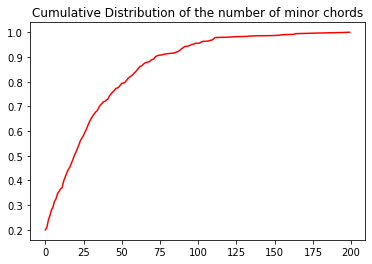

In [7]:
Maj_nums = [file_infos[file][2] for file in file_infos]
Maj_num_counter = collections.Counter(Maj_nums)
Maj_nums = np.array(list(Maj_num_counter.keys()))
sort_idx = np.argsort(Maj_nums)
Maj_nums_sort = Maj_nums[sort_idx]
Maj_num_counts = np.array(list(Maj_num_counter.values()))
Maj_num_counts_sort = Maj_num_counts[sort_idx]
p = np.cumsum(Maj_num_counts_sort) / Maj_num_counts_sort.sum()

plt.plot(Maj_nums_sort, p, 'r-')
plt.title("Cumulative Distribution of the number of major chords")
plt.show()


Min_nums = [file_infos[file][3] for file in file_infos]
Min_num_counter = collections.Counter(Min_nums)
Min_nums = np.array(list(Min_num_counter.keys()))
sort_idx = np.argsort(Min_nums)
Min_nums_sort = Min_nums[sort_idx]
Min_num_counts = np.array(list(Min_num_counter.values()))
Min_num_counts_sort = Min_num_counts[sort_idx]
p = np.cumsum(Min_num_counts_sort) / Min_num_counts_sort.sum()

plt.plot(Min_nums_sort, p, 'r-')
plt.title("Cumulative Distribution of the number of minor chords")
plt.show()

# 2. Distribution of the Magnitude of Chromavector Changes



In [ ]:
def l2_norm(x):
	x_norm = x * x
	x_norm = np.sum(x_norm)
	x_norm = np.sqrt(x_norm)
	return x_norm

alpha_chromas: The adjacent chromagrams have different chords.

beta_chromas:The adjacent chromagrams have the same chord.

100%|██████████| 470/470 [00:01<00:00, 367.05it/s]


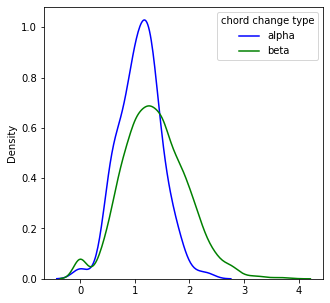

In [ ]:
alpha_chromas = []    # chord change
beta_chromas = []     # same chord
prev_chord = 0
prev_chroma = []

song = 0

for file in tqdm(train_files):

    if song == 0:
        chroma_data = open(chroma_path + file + '/bothchroma.csv', 'r')
        chord_data = open(chord_path + file + '/majmin.lab', 'r')

        chord_line = chord_data.readline()

        start_end_chord = chord_line.split()
        end = float(start_end_chord[1])
        i = 0
        for chroma_line in chroma_data:
            time_chroma = chroma_line.split(',')
            t = float(time_chroma[1])
            if t > end:
                chord_line = chord_data.readline()
                if not chord_line: break
                start_end_chord = chord_line.split()
                if len(start_end_chord) < 3: break
                end = float(start_end_chord[1])

            chroma = time_chroma[2:]
            chroma[-1] = chroma[-1][:-1]
            chroma = list(map(float, chroma))
            chord = start_end_chord[2]
            chord = chord2index[chord]

            if i == 0:  # first time of the song
                i = 1
            else:   # compare the chord
                L2_norm = l2_norm(np.array(chroma) - np.array(prev_chroma))
                if chord != prev_chord:
                    alpha_chromas.append(L2_norm)
                else:
                    beta_chromas.append(L2_norm)
            prev_chord = chord
            prev_chroma = chroma

        chroma_data.close()
        chord_data.close()
    
    song = 1

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax = sns.kdeplot(alpha_chromas, color="blue", label="alpha")
ax = sns.kdeplot(beta_chromas, color="green", label="beta")

plt.legend(title="chord change type")
plt.show()

To see the tendency of L2 norm values in one song.

chord change indices: [478, 525, 757, 897, 1012, 1059, 1406, 1592, 1777, 1869, 3435, 3598, 3714]
percentage: 0.14606741573033707


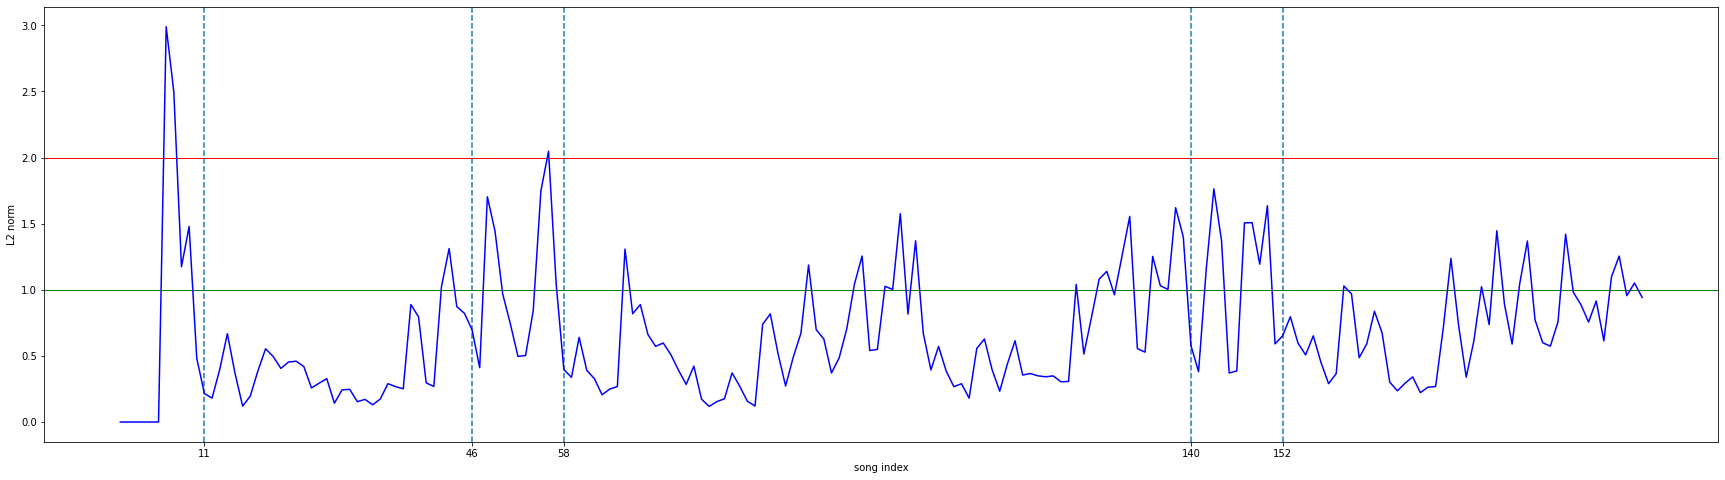

In [ ]:
l2_norms = [] # containing L2 norm values
prev_chord = 0
prev_chroma = []
chord_indices = [] # the index of one song which chord changes at

# example file: 1123
file = '0758'
chroma_data = open(chroma_path + file + '/bothchroma.csv', 'r')
chord_data = open(chord_path + file + '/majmin.lab', 'r')
chord_line = chord_data.readline()

start_end_chord = chord_line.split()
end = float(start_end_chord[1])
i = 0
for idx, chroma_line in enumerate(chroma_data):
    time_chroma = chroma_line.split(',')
    t = float(time_chroma[1])
    if t > end:
        chord_line = chord_data.readline()
        if not chord_line: break
        start_end_chord = chord_line.split()
        if len(start_end_chord) < 3: break
        end = float(start_end_chord[1])

    chroma = time_chroma[2:]
    chroma[-1] = chroma[-1][:-1]
    chroma = list(map(float, chroma))
    chord = start_end_chord[2]
    chord = chord2index[chord]

    if i == 0:  # first time of the song
        i = 1
    else:   # compare the chord
        L2_norm =l2_norm(np.array(chroma) - np.array(prev_chroma))
        l2_norms.append(L2_norm)
        if prev_chord != chord: # detect chord change
            chord_indices.append(idx)

    prev_chord = chord
    prev_chroma = chroma

chroma_data.close()

check = [res for res in chord_indices if l2_norms[res] > 1.5]

print("chord change indices: {}".format(check))
print("percentage: {}".format(len(check)/len(chord_indices)))

chord_data.close()

plt.figure(figsize=(30,8))
plt.xticks(chord_indices)
plt.axhline(y=2, color='r', linewidth=1)
plt.axhline(y=1, color='g', linewidth=1)
for index in chord_indices:
    if index >= 200:
        break
    plt.axvline(x=index, ls='--')
plt.plot(l2_norms[:200], 'b')
plt.xlabel('song index')
plt.ylabel('L2 norm')
plt.show()

In [ ]:
l2_norms = [] # containing L2 norm values
prev_chord = 0
prev_chroma = []
chord_indices = [] # the index of one song which chord changes at

# example file: 1123
# 1.5 보다 클 때는 31.46%
# 1보다 클 때는 68.43%
file = '0758'
probs = []

for file in tqdm(train_files):
    chroma_data = open(chroma_path + file + '/bothchroma.csv', 'r')
    chord_data = open(chord_path + file + '/majmin.lab', 'r')
    chord_line = chord_data.readline()

    start_end_chord = chord_line.split()
    end = float(start_end_chord[1])
    i = 0
    for idx, chroma_line in enumerate(chroma_data):
        time_chroma = chroma_line.split(',')
        t = float(time_chroma[1])
        if t > end:
            chord_line = chord_data.readline()
            if not chord_line: break
            start_end_chord = chord_line.split()
            if len(start_end_chord) < 3: break
            end = float(start_end_chord[1])

        chroma = time_chroma[2:]
        chroma[-1] = chroma[-1][:-1]
        chroma = list(map(float, chroma))
        chord = start_end_chord[2]
        chord = chord2index[chord]

        if i == 0:  # first time of the song
            i = 1
        else:   # compare the chord
            L2_norm =l2_norm(np.array(chroma) - np.array(prev_chroma))
            l2_norms.append(L2_norm)
            if prev_chord != chord: # detect chord change
                chord_indices.append(idx)

        prev_chord = chord
        prev_chroma = chroma

    chroma_data.close()
    chord_data.close()

    check = [res for res in chord_indices if l2_norms[res] > 1]
    probs.append(len(check)/len(chord_indices) * 100)

print(np.mean(np.array(probs)))

100%|██████████| 470/470 [01:00<00:00,  7.81it/s]

68.4267085811223


# 3. Show how much chord types occur disproportionately

In [8]:
chord_count = [0 for i in range(num_chords)]

for file in tqdm(train_files + validation_files + test_files):
  f = open(chord_path + file + '/majmin.lab', 'r')
  for line in f:
      if not line: break
      start_end_chord = line.split()
      if len(start_end_chord) < 3: break
      chord = start_end_chord[2]
      chord_count[chord2index[chord]] += 1
  f.close()

100%|██████████| 588/588 [04:12<00:00,  2.33it/s]


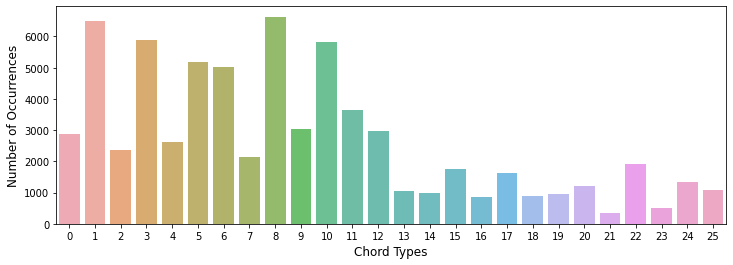

8 G:maj 6632
21 Ab:min 355


In [9]:
plt.figure(figsize=(12,4))
sns.barplot(x=list(range(num_chords)), y=chord_count, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Chord Types', fontsize=12)
plt.show()

maxoccur = max(chord_count[1:])
chord_max = chord_count.index(maxoccur)
minoccur = min(chord_count[1:])
chord_min = chord_count.index(minoccur)

print(chord_max, index2chord[chord_max], maxoccur)
print(chord_min, index2chord[chord_min], minoccur)

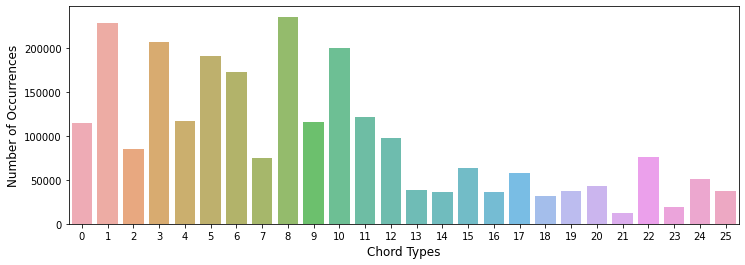

8 G:maj 236005
21 Ab:min 12461


In [ ]:
chord_count = [0 for i in range(num_chords)]

for chord_sequence in train_chord_sequences:
  for chord in chord_sequence:
    chord_count[chord] += 1

for chord_sequence in validation_chord_sequences:
  for chord in chord_sequence:
    chord_count[chord] += 1

for chord_sequence in test_chord_sequences:
  for chord in chord_sequence:
    chord_count[chord] += 1

plt.figure(figsize=(12,4))
sns.barplot(x=list(range(num_chords)), y=chord_count, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Chord Types', fontsize=12)
plt.show()

maxoccur = max(chord_count[1:])
chord_max = chord_count.index(maxoccur)
minoccur = min(chord_count[1:])
chord_min = chord_count.index(minoccur)

print(chord_max, index2chord[chord_max], maxoccur)
print(chord_min, index2chord[chord_min], minoccur)